## Comprehensive Numpy Usage & Examples ##

In [1]:
import numpy as np

#### Creation ####

In [14]:
a = np.array([[1,2],[3,4]])
print(type(a))
print(type(a[0]))
b = np.array([1,2,3,4], ndmin=2)
b

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[1, 2, 3, 4]])

In [38]:
'''
numpy.empty(shape, dtype = float, order = 'C')
'''
a = np.empty((2, 3), dtype=int)
a

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
'''
numpy.zeros(shape, dtype = float, order = 'C')
numpy.ones(shape, dtype = None, order = 'C')
'''

#### Attributes ####

In [35]:
# shape
b.shape

(2, 2)

In [18]:
b.shape = (2,2) # equivalent to reshape
b

array([[1, 2],
       [3, 4]])

In [26]:
# ndim
a = np.arange(6)
print(a)
a = a.reshape((2, 3, 1))
a.ndim

[0 1 2 3 4 5]


3

In [27]:
# itemsize
a.itemsize

8

In [34]:
# flags
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

#### Array from Existing Data ####

In [9]:
# numpy.asarray(a, dtype = None, order = None)
a = (1, 2, 3)
print(np.asarray(a))
b = [(1,2,3),(4,5)]
b = np.asarray(b, dtype=object)
print(b) # ragged array: specify dtype
print(type(b[0]))

[1 2 3]
[(1, 2, 3) (4, 5)]
<class 'tuple'>


In [18]:
"""
numpy.frombuffer(buffer, dtype = float, count = -1, offset = 0)
    This function interprets a buffer as one-dimensional array.
    count: The number of items to read, default -1 means all data
    offset: The starting position to read from. Default is 0
""" 
s = b'Hello World'
a = np.frombuffer(s, dtype='S1')
a

array([b'H', b'e', b'l', b'l', b'o', b' ', b'W', b'o', b'r', b'l', b'd'],
      dtype='|S1')

In [27]:
"""
numpy.fromiter(iterable, dtype, count=-1)
    count: The number of items to be read from iterator. Default is -1 which means all data to be read
"""
i = range(5) # i = iter(range(5))
np.fromiter(i, dtype=np.int32)


array([0, 1, 2, 3, 4], dtype=int32)

#### Array from Numerical Ranges ####

In [31]:
# numpy.arange(start, stop, step, dtype)
a = np.arange(10, 25, 3.1, dtype=np.float64)
a

array([10. , 13.1, 16.2, 19.3, 22.4])

In [34]:
""" 
numpy.linspace(start, stop, num, endpoint, retstep, dtype)
    stop: The end value of the sequence, included in the sequence if endpoint set to true
    num: The number of evenly spaced samples to be generated. Default is 50
    endpoint: True by default, hence the stop value is included in the sequence. If false, it is not included
    retstep: If true, returns samples and step between the consecutive numbers
"""
# similar to arange() function, instead of step size, 
# the number of evenly spaced values between the interval is specified
x = np.linspace(10, 20, 5)
x


array([10. , 12.5, 15. , 17.5, 20. ])

In [ ]:
# numpy.logspace(start, stop, num, endpoint, base, dtype)


#### Indexing & Slicing ####

In [2]:
a = np.arange(1, 20)
s = slice(2, 7, 2) # index
print(a)
a[s]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([3, 5, 7])

In [5]:
 a[2:7:2] # [start:stop:step]

array([3, 5, 7])

In [6]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 
a

array([[1, 2, 3],
       [3, 4, 5],
       [4, 5, 6]])

In [11]:
a[1,...]

array([3, 4, 5])

In [12]:
a[...,1]

array([2, 4, 5])

In [13]:
a[..., 1:]

array([[2, 3],
       [4, 5],
       [5, 6]])

In [4]:
x = np.array([[1, 2], [3, 4], [5, 6]]) 
y = x[[0,1,2], [0,1,0]] 
y
# selects elements at (0,0), (1,1), (2,0)

array([1, 4, 5])

In [12]:
x = np.array([[ 0,  1,  2],[ 3,  4,  5],[ 6,  7,  8],[ 9, 10, 11]]) 
print(x)
rows = np.array([[0,0],[3,3]])
cols = np.array([[0,2],[0,2]]) 
y = x[rows,cols] # (0,0), (0,2), (3,0), (3,2)
y

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[ 0,  2],
       [ 9, 11]])

In [11]:
z = x[1:, 1:3]
z

array([[ 4,  5],
       [ 7,  8],
       [10, 11]])

In [16]:
x[1:,[0,2]]

array([[ 3,  5],
       [ 6,  8],
       [ 9, 11]])

In [18]:
# boolean array indexing
x[x>5]

array([ 6,  7,  8,  9, 10, 11])

In [20]:
a = np.array([np.nan, 1,2,np.nan,3,4,5]) 
a

array([nan,  1.,  2., nan,  3.,  4.,  5.])

In [25]:
a[np.isnan(a) == False]
a[~np.isnan(a)]

array([1., 2., 3., 4., 5.])

In [29]:
a = np.array([1, 2+6j, 5, 3.5+5j]) 
a[np.iscomplex(a)]

array([2. +6.j, 3.5+5.j])

#### Masked Arrays ####
handle incomplete or invalid data 

In [36]:
'''
https://numpy.org/doc/stable/reference/maskedarray.generic.html
A mask is either nomask, indicating that no value of the associated array is invalid, 
or an array of booleans that determines for each element of the associated array whether the value is valid or not.
'''
import numpy.ma as ma
x = np.array([1,2,3,-1,5])
mx = ma.masked_array(x, mask=x<0)
print(mx)
mx.mean()

[1 2 3 -- 5]


2.75

In [37]:
x = np.array([(1, 1.), (2, 2.)], dtype=[('a',int), ('b', float)])
x.view(ma.MaskedArray)

masked_array(data=[(1, 1.0), (2, 2.0)],
             mask=[(False, False), (False, False)],
       fill_value=(999999, 1.e+20),
            dtype=[('a', '<i8'), ('b', '<f8')])

#### Broadcasting ####

In [3]:
# element-wise operation with arrays of same size
a = np.array([1,2,3,4]) 
b = np.array([10,20,30,40]) 
a * b 

array([ 10,  40,  90, 160])

In [8]:
# diff dim:
# smaller array is broadcast to the size of larger array
a = np.array([1,2,3])
b = np.array([[2,3,4],[5,6,7],[8,9,10]])
a + b

array([[ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

#### Iterating OverArray ####

In [11]:
# numpy.nditer: multidimensional iterator 
a = np.arange(0, 60, 3).reshape(4,-1)
a

array([[ 0,  3,  6,  9, 12],
       [15, 18, 21, 24, 27],
       [30, 33, 36, 39, 42],
       [45, 48, 51, 54, 57]])

In [17]:
for x in np.nditer(a):
    print(x, end=' ')

0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 

In [18]:
for x in np.nditer(a.T):
    print(x, end=' ')

0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 

In [20]:
for x in np.nditer(a, order='F'):
    print(x, end=' ')

0 15 30 45 3 18 33 48 6 21 36 51 9 24 39 54 12 27 42 57 

In [25]:
# op_flags
# default value is read-only, can be set to read-write or write-only
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
for x in np.nditer(a, op_flags=['readwrite']):
    x[...] = x*2
a

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [30]:
# broadcasting iteration
a = np.arange(0,60,5) 
a = a.reshape(3,4) 
b = np.array([1, 2, 3, 4])
for x, y in np.nditer([a,b]):
    print("{:2}:{:2}".format(x, y), end='\t')

 0: 1	 5: 2	10: 3	15: 4	20: 1	25: 2	30: 3	35: 4	40: 1	45: 2	50: 3	55: 4	

#### Changing Shape ####

In [32]:
"""
numpy.reshape(arr, newshape, order')
    arr: Array to be reshaped
    newshape: int or tuple of int. New shape should be compatible to the original shape
    order: 'C' for C style, 'F' for Fortran style, 'A' means Fortran like order if an array is stored in Fortran-like contiguous memory, C style otherwise
"""
a = np.arange(8)
print('orginal array\n', a)
b = np.reshape(a, (4,2))
print('reshaped array\n', b)
c = b.reshape((2,4,1))
print('reshaped array\n', c)
b.reshape((4,-1))

orginal array
 [0 1 2 3 4 5 6 7]
reshaped array
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]
reshaped array
 [[[0]
  [1]
  [2]
  [3]]

 [[4]
  [5]
  [6]
  [7]]]


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [16]:
"""
np.ndarray.flat
    This function returns a 1-D iterator over the array. It behaves similar to Python's built-in iterator.
"""
print('original array\n', c)
flat_array = c.flat
print('flattened array\n', np.array(flat_array))

original array
 [[[0]
  [1]
  [2]
  [3]]

 [[4]
  [5]
  [6]
  [7]]]
flattened array
 [0 1 2 3 4 5 6 7]


In [22]:
"""
ndarray.flatten(order)
    This function returns a copy of an array collapsed into one dimension. 
    order: see reshape
"""
flattened_array = c.flatten()
flattened_array[0] = 1000
print(c)

[[[0]
  [1]
  [2]
  [3]]

 [[4]
  [5]
  [6]
  [7]]]


In [26]:
"""
numpy.ravel(a, order)
    This function returns a flattened one-dimensional array. 
    A copy is made only if needed. 
    The returned array will have the same type as that of the input array. 
"""
ravelled_array = c.ravel()
ravelled_array[0] = 1000
print(c)
# difference between flatten & ravel():
# flatten always return a copy, ravel may not
# ie whether modifying array changes original array

[[[1000]
  [   1]
  [   2]
  [   3]]

 [[   4]
  [   5]
  [   6]
  [   7]]]


#### Transpose Operations ####

In [40]:
"""
numpy.transpose(arr, axes)
    axes: List of ints, corresponding to the dimensions. By default, the dimensions are reversed
"""
a = np.arange(12).reshape((3,4,1))
print('original\n', a)
a_t = np.transpose(a, axes=[2,1,0])
print('transposed\n', a_t)

original
 [[[ 0]
  [ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]
  [ 7]]

 [[ 8]
  [ 9]
  [10]
  [11]]]
transposed
 [[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]]


In [41]:
"""
numpy.ndarray.T
    This function belongs to ndarray class. It behaves similar to numpy.transpose.
"""
a.T

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]])

In [49]:
"""
numpy.rollaxis(arr, axis, start)
    This function rolls the specified axis backwards, until it lies in a specified position. 
    axis: Axis to roll backwards. The position of the other axes do not change relative to one another
    start: Zero by default leading to the complete roll. Rolls until it reaches the specified position
"""
a = np.ones((3,4,5,6))
print('orginal\n', a.shape)
rolled = np.rollaxis(a, 3, 1)
print('rolled\n', rolled.shape)


orginal
 (3, 4, 5, 6)
rolled
 (3, 6, 4, 5)


In [50]:
"""
numpy.swapaxes(arr, axis1, axis2)
    This function interchanges the two axes of an array.
"""
a = np.ones((2,3,4,6))
print('original', a.shape)
b = np.swapaxes(a, 0, 3)
print('swapped', b.shape)

original (2, 3, 4, 6)
swapped (6, 3, 4, 2)


#### Changing Dimensions ####

#### Array Manipulation ####

In [39]:
""" 
numpy.concatenate((a1, a2, ...), axis)
    (a1, a2, ...): Sequence of arrays of the same type
    axis: Axis along which arrays have to be joined. Default is 0
"""
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[9,10],[11, 12]])
join_list = [a, b, c]
print('axis=0 concatenation')
print(np.concatenate(join_list, axis=0))
print('axis=1 concatenation')
print(np.concatenate(join_list, axis=1))

axis=0 concatenation
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
axis=1 concatenation
[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


In [38]:
d = np.array([[[1],[2]],[[3],[4]]])
e = np.array([[[5],[6]],[[7],[8]]])
print('axis0\n', np.concatenate((d, e), axis=0))
print('axis1\n', np.concatenate((d, e), axis=1))
print('axis2\n', np.concatenate((d, e), axis=2))

axis0
 [[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]

 [[7]
  [8]]]
axis1
 [[[1]
  [2]
  [5]
  [6]]

 [[3]
  [4]
  [7]
  [8]]]
axis2
 [[[1 5]
  [2 6]]

 [[3 7]
  [4 8]]]


In [37]:
"""
numpy.stack(arrays, axis)
    arrays: Sequence of arrays of the same shape
    axis: Axis in the resultant array along which the input arrays are stacked
"""
stack_list = [a, b, c]
print("axis0\n", np.stack(stack_list, axis=0))
print("axis1\n", np.stack(stack_list, axis=1))

axis0
 [[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
axis1
 [[[ 1  2]
  [ 5  6]
  [ 9 10]]

 [[ 3  4]
  [ 7  8]
  [11 12]]]


In [54]:
"""
numpy.hstack
    Variants of numpy.stack function to stack so as to make a single array horizontally.
"""
(np.hstack((a,b,c)) != np.concatenate((a,b,c), axis=1)).sum().sum() == 0
# same as concatenate axis=1

True

In [57]:
"""
numpy.vstack
    Variants of numpy.stack function to stack so as to make a single array vertically.
"""
(np.vstack((a,b,c)) != np.concatenate((a,b,c), axis=0)).sum().sum() == 0
# same as concatenate axis=0

True

#### Binary Operators ####

In [33]:
# bitwise_and
# bitwise_or
# invert
# left_shift
# right_shift
# example:
a, b = 13, 17
print(bin(a), bin(b))
np.bitwise_and(a, b)

0b1101 0b10001


1

#### String Functions ####

In [34]:
# https://www.tutorialspoint.com/numpy/numpy_string_functions.htm

In [36]:
a = np.char.encode('hello', 'cp500')
print(a)

b'\x88\x85\x93\x93\x96'


#### Mathematical functions ####

In [2]:
a = np.array([0,30,45,60,90])
np.sin(a * np.pi / 180) # 180 = 1 radian

array([0.        , 0.5       , 0.70710678, 0.8660254 , 1.        ])

In [7]:
# sin, cos, tan, arcsin, arccos, degrees
# around
a = np.array([1.0,5.55, 123, 0.567, 25.532])
print(np.around(a))
print(np.around(a, decimals=1))
print(np.around(a, decimals=-1))

[  1.   6. 123.   1.  26.]
[  1.    5.6 123.    0.6  25.5]
[  0.  10. 120.   0.  30.]


In [8]:
# floor, ceil

In [9]:
# arithmetic operations
a = np.arange(9, dtype = np.float_).reshape(3,3) 
b = np.array([10,10,10])
print(a)
print(b)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[10 10 10]


In [10]:
np.add(a,b) # subtract, multiply, divide

array([[10., 11., 12.],
       [13., 14., 15.],
       [16., 17., 18.]])

In [12]:
a = np.array([0.25, 1.33, 1, 0, 100]) 
np.reciprocal([100])

array([0])

In [15]:
# power
a = np.array([2, 3, 5])
b = np.array([2, 3, 4])
print(np.power(a, b))
print(np.power(a, 3))

[  4  27 625]
[  8  27 125]


In [17]:
# mod/remainder
a = np.array([10, 20, 30])
b = np.array([3, 5, 7])
print(np.mod(a, b))
print(np.remainder(a, b))

[1 0 2]
[1 0 2]


#### Statistical Functions ####

In [5]:
'''
numpy.amin() and numpy.amax():
    return the minimum and the maximum from the elements 
    in the given array along the specified axis
'''
a = np.array([[3,7,5],[8,4,3],[2,4,9]])
print(np.max(a, axis=0))
print(np.amax(a, axis=1))

[8 7 9]
[7 8 9]


In [10]:
a = np.array([1,2,3])
b = np.array([[2,3,4],[0,4,0]])
np.maximum(a, b)

array([[2, 3, 4],
       [1, 4, 3]])

In [14]:
'''
numpy.ptp():
    returns the range (maximum-minimum) of values along an axis.
'''
a = np.array([[3,7,5],[8,4,3],[2,4,9]]) 
print(a)
print(np.ptp(a))
print(np.ptp(a, axis=0))
print(np.ptp(a, axis=1))

[[3 7 5]
 [8 4 3]
 [2 4 9]]
7
[6 3 6]
[4 5 7]


In [18]:
'''
numpy.percentile(a, q, axis):
    q: The percentile to compute must be between 0-100
'''
a = np.array([[30,40,70],[80,20,10],[50,90,60]])
print(np.percentile(a, 20))
print(np.percentile(a, 50, axis=0))
print(np.percentile(a, 50, axis=1))

26.0
[50. 40. 60.]
[40. 20. 60.]


In [ ]:
# np.median
# np.mean
# np.average -> weights
# standard

#### Sort, Search & Counting Functions ####

In [5]:
'''
numpy.sort(a, axis, kind, order)
    kind: quicksort by default
'''
a = np.array([[1,10,7], [2, -100,3]])
print(np.sort(a, axis=0))
print(np.sort(a, axis=1))

[[   1 -100    3]
 [   2   10    7]]
[[   1    7   10]
 [-100    2    3]]


In [7]:
# Order parameter in sort function 
dt = np.dtype([('name', 'S10'),('age', int)]) 
a = np.array([("raju",21),("anil",25),("ravi", 17), ("amar",27)], dtype = dt) 
np.sort(a, order='name')

array([(b'amar', 27), (b'anil', 25), (b'raju', 21), (b'ravi', 17)],
      dtype=[('name', 'S10'), ('age', '<i8')])

In [13]:
'''
np.argsort():
    return the array of indices of data
'''
a = np.array([[1,10,7], [2, -100,3]])
indices = np.argsort(a)
# use args to construct sorted array
print(a[0][indices[0]])
np.take_along_axis(a, indices, axis=1)

[ 1  7 10]


array([[   1,    7,   10],
       [-100,    2,    3]])

In [15]:
'''
np.lexsort():
    performs an indirect sort using a sequence of keys
'''
nm = ('raju','anil','ravi','amar') 
dv = ('f.y.', 's.y.', 's.y.', 'f.y.') 
ind = np.lexsort((dv,nm)) 
print(ind)
[nm[i] + ", " + dv[i] for i in ind] 

[3 1 0 2]


['amar, f.y.', 'anil, s.y.', 'raju, f.y.', 'ravi, s.y.']

In [16]:
# np.argmax() / np.argmin()
# return the indices of maximum and minimum elements 
# respectively along the given axis


In [22]:
# np.nonzero(): returns the indices of non-zero elements in the input array
a = np.array([[30,40,0],[0,20,10],[50,0,60]]) 
print(np.nonzero(a))
print(a[np.nonzero(a)])
print(a[1, 1])
print(a[[1], [1]])


(array([0, 0, 1, 1, 2, 2]), array([0, 1, 1, 2, 0, 2]))
[30 40 20 10 50 60]
20
[20]


In [4]:
# np.where: returns the indices of elements in an input array 
# where the given condition is satisfied
x = np.arange(9.).reshape(3, 3) 
print(x)
print(x[np.where(x > 3)])

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[4. 5. 6. 7. 8.]


In [2]:
# np.extract:
# returns the elements satisfying any condition
x = np.arange(9.).reshape(3, 3) 
print(x)


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


#### Byte Swapping ####

In [6]:
# numpy.ndarray.byteswap()
# toggles between the two representations: bigendian and little-endian
a = np.array([1, 256, 8755], dtype = np.int16) 
print(list(map(hex, a)))
a.byteswap(True)
print(list(map(hex, a)))

['0x1', '0x100', '0x2233']
['0x100', '0x1', '0x3322']


#### Copies & Views ####

In [11]:
# copy: contents are physically stored in another location
# view: a different view of the same memory content is provided
a = np.arange(6)
print(a)
print(id(a))
b = a
print(id(b))
b.shape = 3,2
print(a.shape)
# changes made to b is also made to a

[0 1 2 3 4 5]
140345385151720
140345385151720
(3, 2)


In [16]:
# shallow copy
a = np.arange(6)
print(id(a))
b = a.view()
print(id(b))
b[0] = 1
print(a)

140345385151984
140345385151456
[1 1 2 3 4 5]


In [23]:
c = a[:] # create view
print(id(c))
c[1] = 100
print(a)
print(c)

140345385151896
[  1 100   2   3   4   5]
[  1 100   2   3   4   5]


In [25]:
# deep copy
d = a.copy()
print(id(a))
print(id(d))
d[0] = 1000
print(d)
print(a) # do not share data

140345385151984
140345385152248
[1000  100    2    3    4    5]
[  1 100   2   3   4   5]


#### Matrix Library ####

In [4]:
import numpy.matlib

In [5]:
# numpy.matlib.empty(shape, dtype, order)
# returns a new matrix without initializing the entries
np.matlib.empty((2,2)) # filled with random data

matrix([[-1.49166815e-154,  3.11108036e+231],
        [ 2.00389314e+000,  2.78134232e-309]])

In [6]:
np.matlib.zeros((2,2)) 

matrix([[0., 0.],
        [0., 0.]])

In [11]:
a = np.matlib.ones((2,2))
a

matrix([[1., 1.],
        [1., 1.]])

In [12]:
# diagonal matrix
np.matlib.eye(n=3, M=4, k=0, dtype=float)

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])

In [13]:
# identity matrix
np.matlib.identity(5, dtype=float)

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [23]:
np.matlib.rand(3,3) # uniform distribution over [0, 1)

matrix([[0.57726715, 0.13797572, 0.54503648],
        [0.48405165, 0.3171644 , 0.73267288],
        [0.01757576, 0.40889099, 0.97505962]])

In [25]:
i = np.matrix('1,2;3,4') 
i

matrix([[1, 2],
        [3, 4]])

In [26]:
np.asarray(i)

array([[1, 2],
       [3, 4]])

In [27]:
a = np.array([[[1],[2],[3]]])
np.asmatrix(a) # matrix is always 2-dimensional

matrix([[1, 2, 3]])

#### Linear Algebra ####

In [4]:
# dot product
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]])
print(np.dot(a, b))
print(np.dot([1,2,3,4],[11,12,13,14]))

[[37 40]
 [85 92]]
130


In [5]:
np.vdot(a,b) # multi-dim arrays are flattened

130

In [7]:
# inner product
np.inner(np.array([1,2,3]),np.array([0,1,0])) # same as dot product

2

In [8]:
a = np.array([[1,2], [3,4]]) 
b = np.array([[11, 12], [13, 14]]) 
np.inner(a,b)
# 1*11+2*12, 1*13+2*14 
# 3*11+4*12, 3*13+4*14 

array([[35, 41],
       [81, 95]])

In [10]:
# matmul: matrix multiplication
a = [[1,0],[0,1]] 
b = [[4,1],[2,2]] 
print(np.matmul(a,b))

[[4 1]
 [2 2]]


In [12]:
a = [[1,0],[0,1]] 
b = [1,2] 
np.matmul(a,b)

array([1, 2])

In [13]:
# determinant
a = np.array([[1,2], [3,4]]) 
np.linalg.det(a)

-2.0000000000000004

In [16]:
# solve
np.linalg.solve([[1,2,3],[2,3,4],[2,5,6]],[0,0,0])

array([0., 0., 0.])

In [17]:
# inverse
x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
np.matmul(x, y)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

#### Matplotlib ####

In [2]:
from matplotlib import pyplot as plt

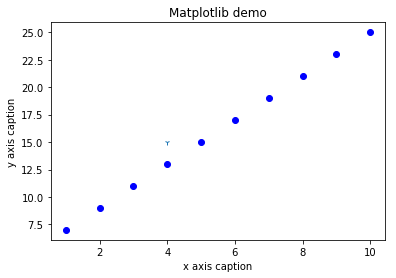

In [30]:
x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y, "ob") 
plt.plot(4, 15, '1')
plt.show()

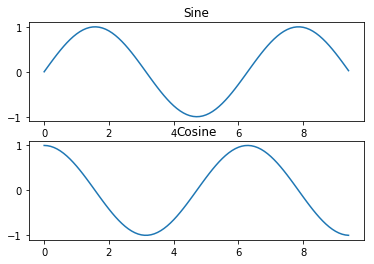

In [31]:
# subplots
x = np.arange(0, 3 * np.pi, 0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
plt.subplot(2, 1, 1)

# plot 1
plt.plot(x, y_sin) 
plt.title('Sine')  

# plot 2
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  

plt.show()

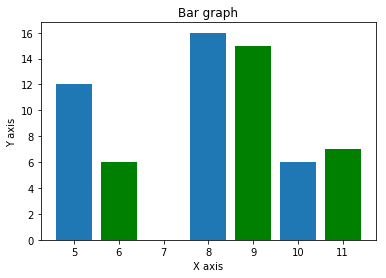

In [32]:
from matplotlib import pyplot as plt 
x = [5,8,10] 
y = [12,16,6]  

x2 = [6,9,11] 
y2 = [6,15,7] 
plt.bar(x, y, align = 'center') 
plt.bar(x2, y2, color = 'g', align = 'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

plt.show()

[3 1 2 1 1 2 2 0 1 2]
[ 5.  13.2 21.4 29.6 37.8 46.  54.2 62.4 70.6 78.8 87. ]


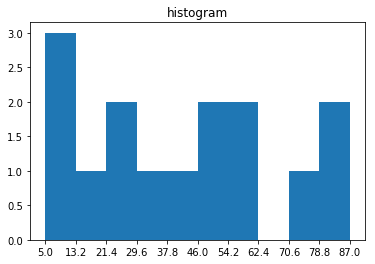

In [14]:
# histogram
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
hist,bins = np.histogram(a, 10) 
print(hist)
print(bins)
plt.hist(a, bins)
plt.xticks(bins) # align x-axis with histogram
plt.title("histogram")
plt.show()

#### I/O with numpy ####

In [15]:
# np.save, np.load
a = np.array([1,2,3,4,5]) 
np.save('outfile',a)

In [20]:
b = np.load('outfile.npy') 
print(b)
print(type(b))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [21]:
# np.savetxt, np.loadtxt
a = np.array([1,2,3,4,5])
np.savetxt('out.txt', a)

In [24]:
b = np.loadtxt('out.txt')
print(b)
print(type(b))

[1. 2. 3. 4. 5.]
<class 'numpy.ndarray'>
